# Split dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

def load_and_split_dataset(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    #data.rename(columns = {'sentiment':'label'}, inplace = True)
    # Splitting the data into train, validation, and test sets
    train, test = train_test_split(data, test_size=0.2)# , stratify=data['label']
    #test = train_test_split(temp, test_size=0.5, stratify=temp['label'])

    # Save the splits to new CSV files
    train.to_csv('/content/drive/MyDrive/Academic_Papers/Arabic Learner/Filtered data/Tongue and Study/train_set.csv', index=False)
    #validation.to_csv('validation_set.csv', index=False)
    test.to_csv('/content/drive/MyDrive/Academic_Papers/Arabic Learner/Filtered data/Tongue and Study/test_set.csv', index=False)

    return train, test

In [ ]:
# Replace 'your_dataset.csv' with your actual file path
file_path = '/content/drive/MyDrive/Academic_Papers/Arabic Learner/Filtered data/Tongue and Study/tongue and study data.csv'
train_set, test_set = load_and_split_dataset(file_path)

In [ ]:
len(test_set)

In [ ]:
data = pd.read_csv('/content/FASSILA_SA.csv')
for i in range(len(data)):
  if pd.isnull(data['label'][i]):
    print(data['text'][i])

In [ ]:
pd.isnull(data['label'][0])

False

In [ ]:
# Create a dictionary of values to replace
label_encoding = {'positive': 1, 'negative': 0, 'neutral': 2}
#read
data_train = pd.read_csv('/content/train_set.csv', sep=',')
data_val = pd.read_csv('/content/validation_set.csv', sep=',')
data_test = pd.read_csv('/content/test_set.csv', sep=',')
# Use the `replace` method to apply the label encoding
data_train['SA_label'] = data_train['SA_label'].replace(label_encoding)
data_val['SA_label'] = data_val['SA_label'].replace(label_encoding)
data_test['SA_label'] = data_test['SA_label'].replace(label_encoding)
#save
data_train.to_csv('train_set.csv', index=False)
data_val.to_csv('validation_set.csv', index=False)
data_test.to_csv('test_set.csv', index=False)

In [ ]:
data_train=data_train.drop(['label'], axis=1)
data_val = data_val.drop(['label'], axis=1)
data_test=data_test.drop(['label'], axis=1)

In [ ]:
data_train = data_train.rename({'SA_label': 'label'}, axis=1)
data_val = data_val.rename({'SA_label': 'label'}, axis=1)
data_test = data_test.rename({'SA_label': 'label'}, axis=1)

In [ ]:
data_val.head()

,source,text,label
0,translated,لغى الخضر فألمانيا تحالف تاع جامايكا الثلاثي,2
1,translated,السيسى على وشك الخروج خاسرا من السباق الرئاسي,0
2,paraphrased,بزاف الإندونيسيين نضممو لواحد المسيرة علا جال ...,2
3,youtube,قاطعوا هده القناة الكادبة لعنت الله عليكم.,0
4,translated,تعديل ضريبي فلسطيني لخفض الإيرادات,0


In [ ]:
#save
data_train.to_csv('/content/drive/MyDrive/Academic_Papers/FASSILA/DATA/Sentiment Analysis/Final data/train_set.csv', index=False)
data_val.to_csv('/content/drive/MyDrive/Academic_Papers/FASSILA/DATA/Sentiment Analysis/Final data/validation_set.csv', index=False)
data_test.to_csv('/content/drive/MyDrive/Academic_Papers/FASSILA/DATA/Sentiment Analysis/Final data/test_set.csv', index=False)

In [ ]:
data_train.groupby(['SA_label']).size()

SA_label
0    2327
1     399
2    5330
dtype: int64

In [ ]:
data_test = pd.read_csv('/content/test_set.csv', sep=',')
len(data_test)

1009

In [ ]:
data_test.groupby(['label']).size()

label
fake    470
real    539
dtype: int64

In [ ]:
data_valid = pd.read_csv('/content/validation_set.csv', sep=',')
len(data_valid)

1009

In [ ]:
data_valid.groupby(['label']).size()

label
fake    469
real    540
dtype: int64

# Calculate the sentence and tokens length

**Calculate the average sentence length**

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

data = {
    'text': [
        "This is the first sentence. This is the second sentence.",
        "Another sentence here. And one more here.",
        # Add more text data here
    ]
}

df = pd.read_csv('/content/validation_set.csv', sep=',')

def calculate_average_sentence_length(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:  # To handle any empty text fields
        return 0
    total_length = sum(len(word_tokenize(sentence)) for sentence in sentences)
    return total_length

df['average_sentence_length'] = df['text'].apply(calculate_average_sentence_length)
df['average_sentence_length'].mean()

**Calculate the tokens' length**

In [ ]:
df = pd.read_csv('/content/test_set.csv', sep=',')
count = 0
for i in range(len(df)):
  count+= len(df['text'][i].split())
print(count)


**Statisitics chart in terms of numerical distribution**

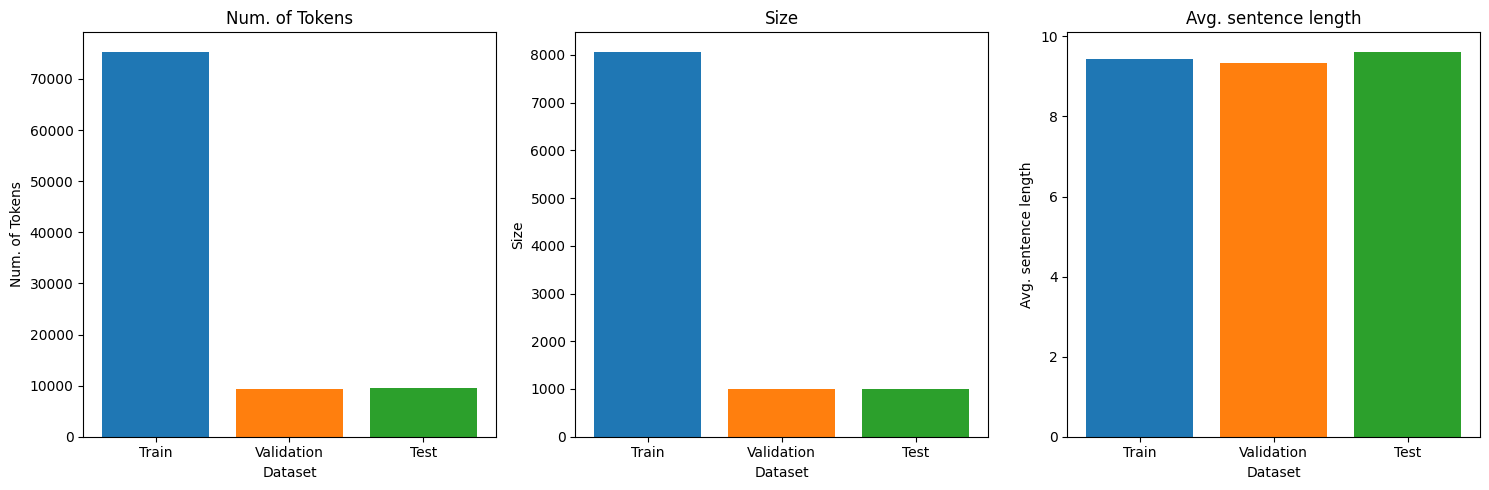

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
statistics = {
    'Num. of Tokens': [75353, 9318, 9604],
    'Size': [8069, 1009, 1009],
    'Avg. sentence length': [9.436, 9.340, 9.620]
}

categories = ['Train', 'Validation', 'Test']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # A set of distinct, visually appealing colors


plt.figure(figsize=(15, 5))

for i, (stat, values) in enumerate(statistics.items(), 1):
    plt.subplot(1, 3, i)
    plt.bar(categories, values, color=colors)
    plt.title(stat)
    plt.xlabel('Dataset')
    plt.ylabel(stat)

plt.tight_layout()
plt.show()

**Statisitics chart in terms of data sources distribution**

In [ ]:
df_train = pd.read_csv('/content/train_set.csv', sep=',')
df_train.groupby(['source']).size()

source
facebook         23
manual         1935
paraphrased    1886
translated     3312
youtube         913
dtype: int64

In [ ]:
df_validation = pd.read_csv('/content/validation_set.csv', sep=',')
df_validation.groupby(['source']).size()

source
facebook         2
manual         245
paraphrased    241
translated     414
youtube        107
dtype: int64

In [ ]:
df_test = pd.read_csv('/content/test_set.csv', sep=',')
df_test.groupby(['source']).size()

source
manual         231
paraphrased    235
translated     413
youtube        129
youtube          1
dtype: int64

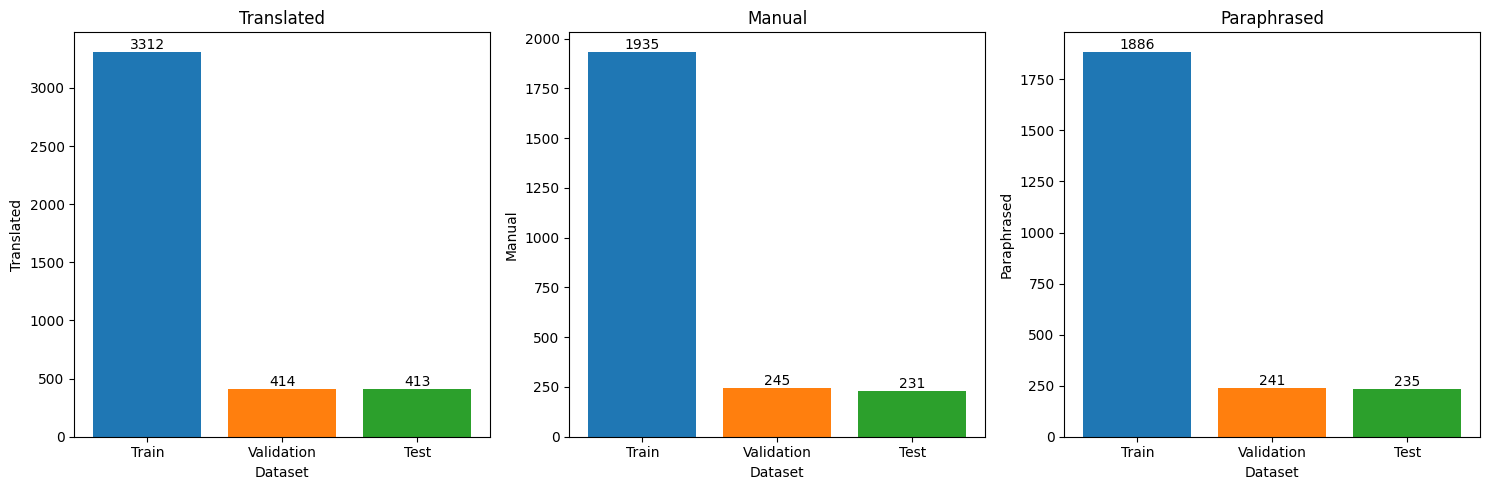

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
statistics = {
    'Translated': [3312, 414, 413],
    'Manual': [1935, 245, 231],
    'Paraphrased': [1886, 241, 235]
}

categories = ['Train', 'Validation', 'Test']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # A set of distinct, visually appealing colors

plt.figure(figsize=(15, 5))

for i, (stat, values) in enumerate(statistics.items(), 1):
    plt.subplot(1, 3, i)
    bars = plt.bar(categories, values, color=colors)
    plt.title(stat)
    plt.xlabel('Dataset')
    plt.ylabel(stat)

    # Add the data labels on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

